In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.metrics import classification_report

# Preprocessing Function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)


In [2]:
# TextBlob Sentiment Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [3]:
# Load and preprocess training data
train_file = "C:\\Users\\LAPTOP SHOP\\Downloads\\twitter_training.csv\\twitter_training.csv"
train_df = pd.read_csv(train_file, header=None)
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Limit the dataset to 500 rows
train_df = train_df.sample(500, random_state=42)

# Preprocess the text column
train_df['Processed_Text'] = train_df['Text'].apply(preprocess_text)

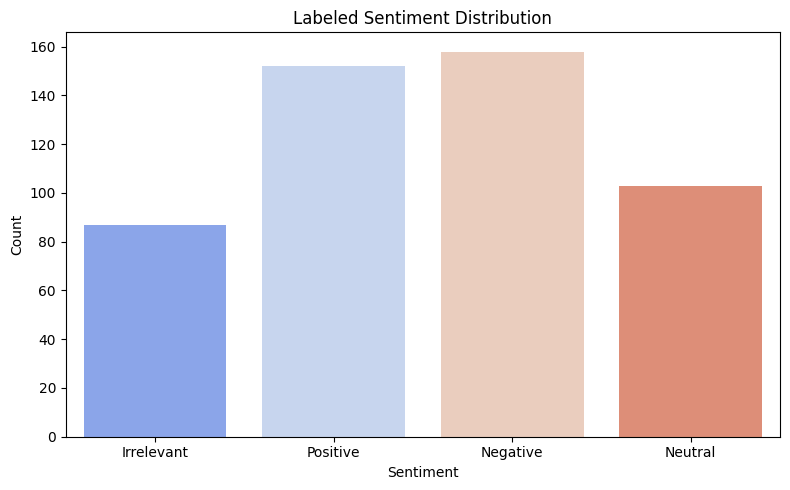

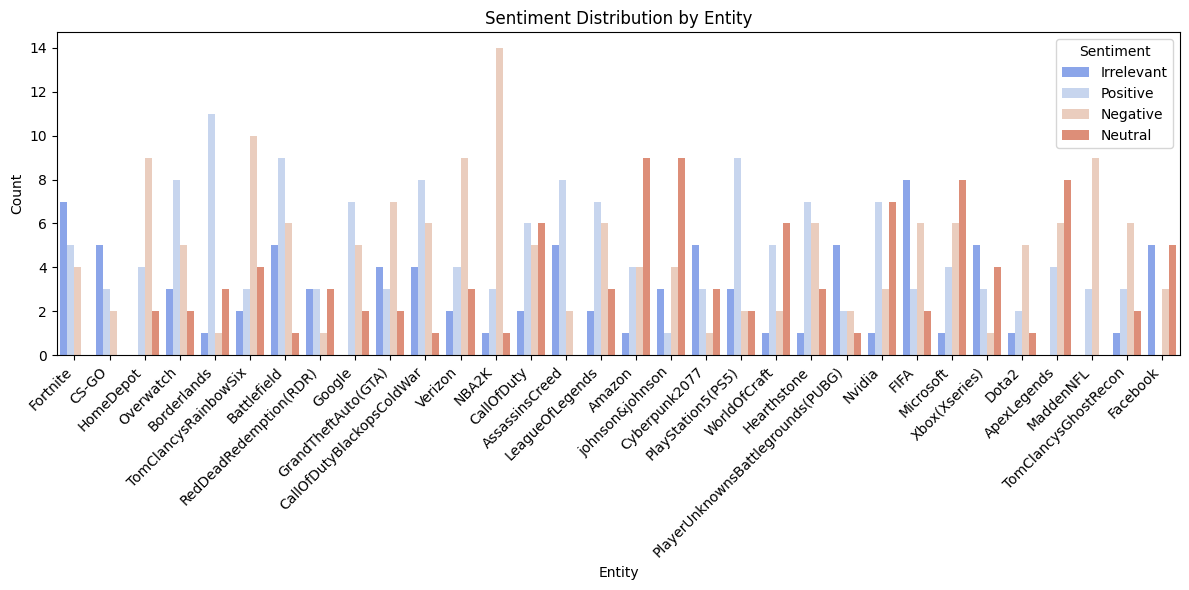

In [4]:
# Labeled Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sentiment', hue='Sentiment', palette='coolwarm', legend=False)
plt.title("Labeled Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

# Save the figure
plt.savefig("labeled_sentiment_distribution.png", dpi=300)
plt.show()

# Sentiment Distribution by Entity
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Entity', hue='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.legend(title="Sentiment") 
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Save the figure
plt.savefig("sentiment_distribution_by_entity.png", dpi=300)
plt.show()



In [5]:
# Save processed data with predictions
train_df.to_csv("processed_training_data_with_predictions.csv", index=False)
print("Processed training data saved with predictions.")

Processed training data saved with predictions.
